<a href="https://colab.research.google.com/github/YaswanthAd/AdClickPrediction/blob/main/Targeted_AD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/YaswanthAd/AdClickPrediction/main/advertising.csv')

# Displaying the first 5 rows of the dataset for a quick overview.
print("Displaying the first 5 rows of the dataset for a quick overview")
print("-----------------------------------")
print(data.head(5))
print("-----------------------------------")

Displaying the first 5 rows of the dataset for a quick overview
-----------------------------------
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

    

In [4]:
# Printing essential information about the dataset, including data types, non-null counts, and memory usage.
print("essential info of the dataset:")
print("-----------------------------------")
print(data.info())
print("-----------------------------------")

essential info of the dataset:
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB
None
-----------------------------------


In [5]:
# Generating descriptive statistics to summarize the central tendency, dispersion, and shape of the dataset.
print("descriptive statistics:")
print("-----------------------------------")
print(data.describe())
print("-----------------------------------")

descriptive statistics:
-----------------------------------
       Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0

<Axes: xlabel='Age', ylabel='Count'>

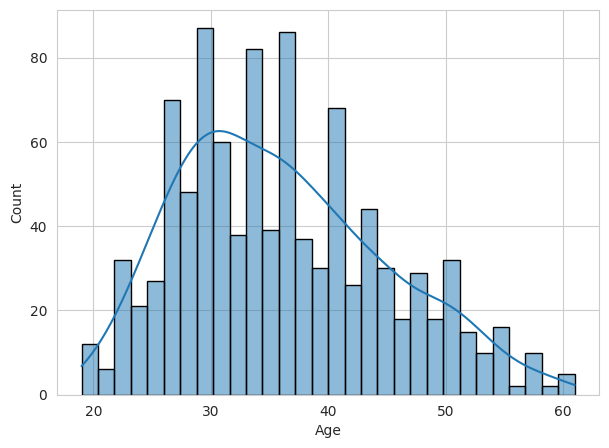

In [6]:
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
sns.histplot(data['Age'], bins=30, kde=True, edgecolor="k", linewidth=1)
#plt.show()


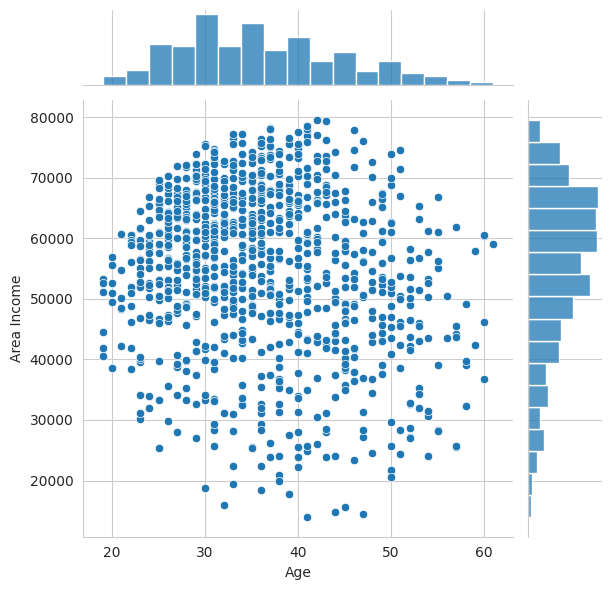

In [7]:
sns.jointplot(x='Age', y='Area Income', data=data)
#plt.show()

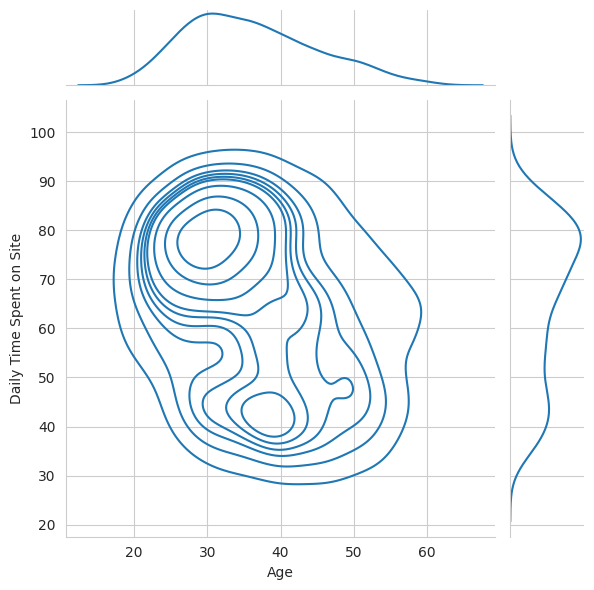

In [8]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=data, kind='kde')
#plt.show()

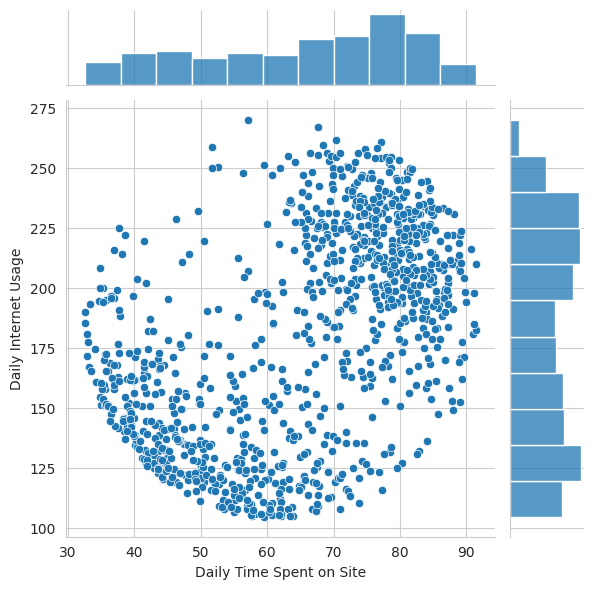

In [9]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data= data)
#plt.show()

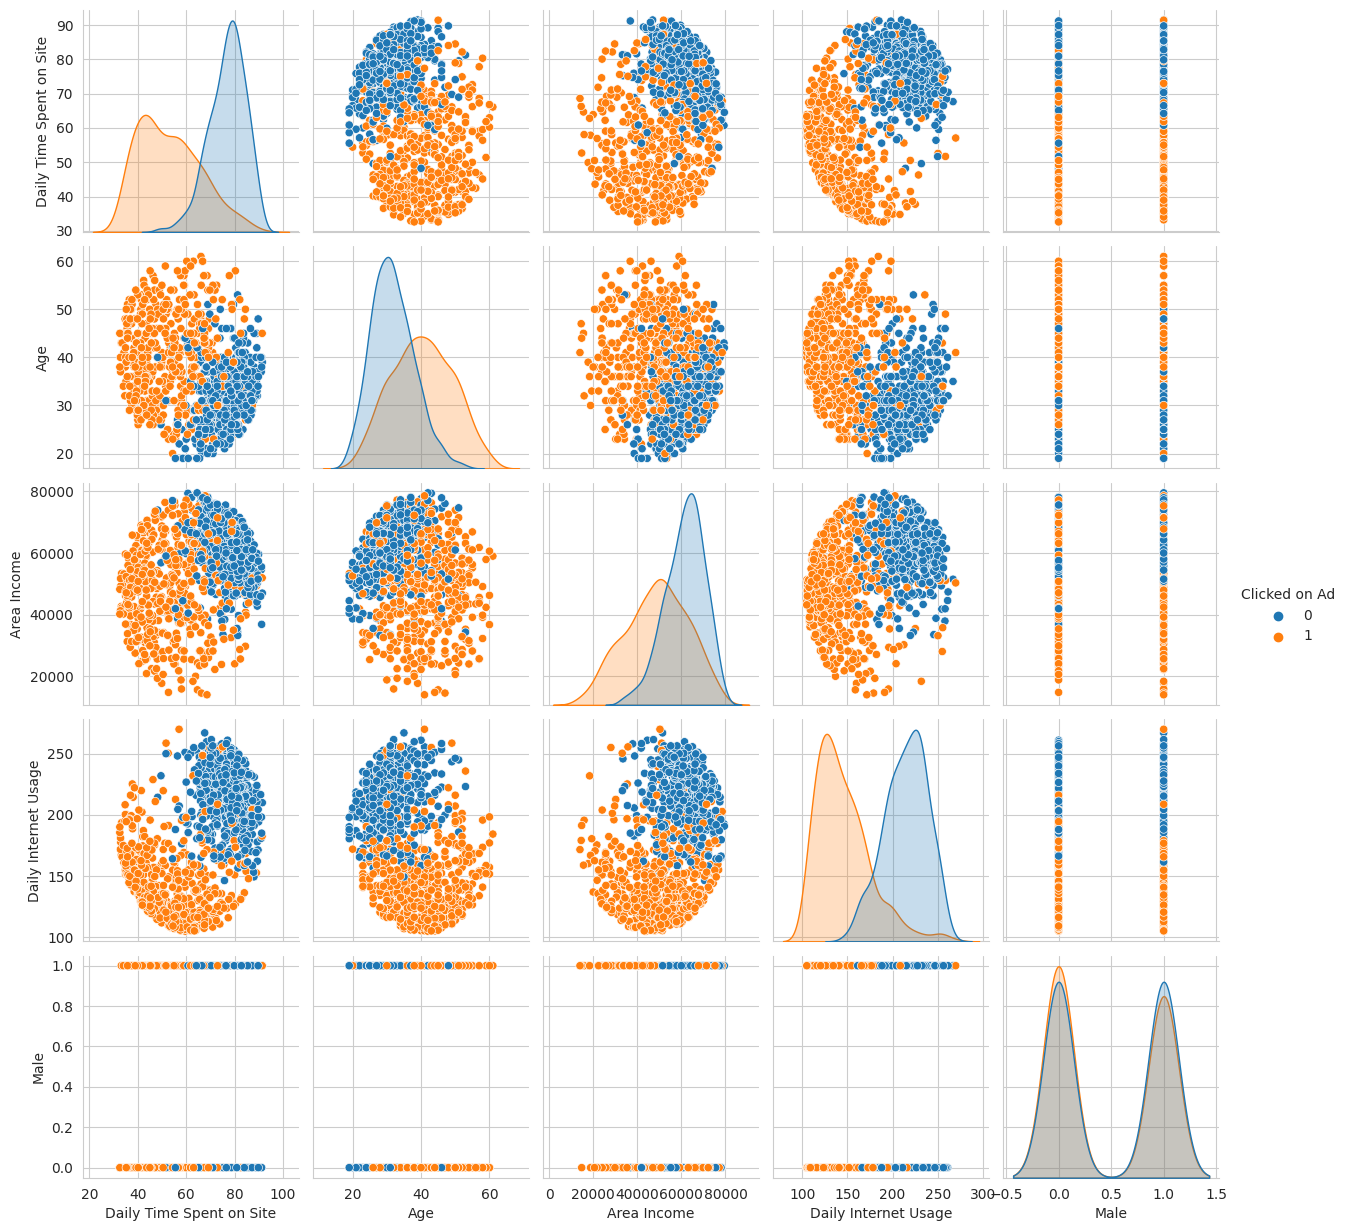

In [10]:
sns.pairplot(data, hue='Clicked on Ad')
#plt.show()

<Axes: >

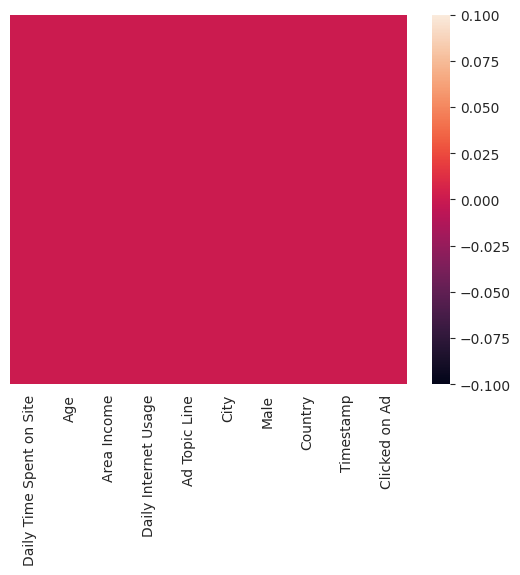

In [11]:
sns.heatmap(data.isnull(), yticklabels=False)
#plt.show()

In [12]:
data['City Codes'] = data['City'].astype('category').cat.codes
data['Country Codes'] = data['Country'].astype('category').cat.codes

In [13]:
data['Month'] = data['Timestamp'].apply(lambda x: x.split('-')[1])
data['Hour'] = data['Timestamp'].apply(lambda x: x.split(':')[0].split(' ')[1])
#quick overview of the selected features for the first few data points in the dataset
print("DataFrame containing specific columns:")
print("-----------------------------------")
print(data[['City Codes', 'Country Codes', 'Month', 'Hour']].head(3))
print("-----------------------------------")

DataFrame containing specific columns:
-----------------------------------
   City Codes  Country Codes Month Hour
0         961            215    03   00
1         903            147    04   01
2         111            184    03   20
-----------------------------------


In [14]:
X = data.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)
#quick overview of the selected features for the first few data points in the dataset after the dropping of few columns
print("Remaing columns after dropping")
print("-----------------------------------")
print(data.head(5))
print("-----------------------------------")
y = data['Clicked on Ad']

Remaing columns after dropping
-----------------------------------
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad

In [15]:
#logistic regression
X = data[['Age', 'Area Income', 'Daily Time Spent on Site', 'City Codes', 'Country Codes', 'Timestamp']]
X = X.copy()  # Create a copy of the DataFrame to avoid the warning
X['Timestamp'] = pd.to_datetime(X['Timestamp'])  # Convert 'Timestamp' column to datetime format
X.loc[:, 'Month'] = X['Timestamp'].dt.month  # Extract the month from the timestamp
X.loc[:, 'Hour'] = X['Timestamp'].dt.hour  # Extract the hour from the timestamp
X = X.drop(['Timestamp'], axis=1)  # Drop the original 'Timestamp' column
X = (X - X.mean()) / X.std()  # Standardizing features for better convergence
X.insert(0, 'Bias', 1)  # Adding bias term
y = data['Clicked on Ad'].values

In [16]:
# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function (log loss or cross-entropy)
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # small value to avoid division by zero in log
    return -(1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

# Define gradient descent to optimize model parameters
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = np.zeros(epochs)

    for epoch in range(epochs):
        h = sigmoid(X @ theta)
        gradient = X.T @ (h - y) / m
        theta -= alpha * gradient
        cost_history[epoch] = cost_function(X, y, theta)

    return theta, cost_history

# Initialize model parameters
theta = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.1
num_epochs = 1000

# Train the logistic regression model on the training set
final_theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_epochs)


In [17]:
# Define the Decision Tree Node class
class Node:
    def __init__(self, gini, prediction, feature=None, threshold=None):
        self.gini = gini
        self.prediction = prediction
        self.feature = feature
        self.threshold = threshold
        self.left = None
        self.right = None

# Calculate Gini impurity for a split
def gini_impurity(y):
    m = len(y)
    unique_classes = np.unique(y)
    impurity = 1
    for cls in unique_classes:
        p = np.sum(y == cls) / m
        impurity -= p**2
    return impurity

# Find the best split for a node
def find_best_split(X, y):
    m, n = X.shape
    best_gini = 1
    best_split = None
    for col in range(1, n):  # Start from column 1 to exclude the 'Bias' column
        thresholds = np.unique(X.iloc[:, col])
        for threshold in thresholds:
            left_indices = X.iloc[:, col] < threshold
            right_indices = ~left_indices
            left_gini = gini_impurity(y[left_indices])
            right_gini = gini_impurity(y[right_indices])
            gini = (np.sum(left_indices) * left_gini + np.sum(right_indices) * right_gini) / m
            if gini < best_gini:
                best_gini = gini
                best_split = (col, threshold)
    return best_gini, best_split

# Build the Decision Tree recursively
def build_tree(X, y):
    gini, prediction = gini_impurity(y), np.argmax(np.bincount(y))
    if gini == 0:
        return Node(gini, prediction)
    best_gini, best_split = find_best_split(X, y)
    if best_gini == gini:
        return Node(gini, prediction)
    col, threshold = best_split
    left_indices = X.iloc[:, col] < threshold
    right_indices = ~left_indices
    left_tree = build_tree(X[left_indices], y[left_indices])
    right_tree = build_tree(X[right_indices], y[right_indices])
    node = Node(gini, prediction, feature=col, threshold=threshold)
    node.left = left_tree
    node.right = right_tree
    return node

# Predict using the Decision Tree
def predict(node, x):
    if node.left is None and node.right is None:
        return node.prediction
    if x[node.feature] < node.threshold:
        return predict(node.left, x)
    else:
        return predict(node.right, x)


In [18]:
# Define Gaussian Naive Bayes class
class GaussianNB:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_class = X[y == c]
            self.parameters.append([])
            for col in range(n_features):
                mean = X_class.iloc[:, col].mean()
                variance = X_class.iloc[:, col].var()
                self.parameters[i].append((mean, variance))

    def _calculate_likelihood(self, mean, var, x):
        eps = 1e-4  # small epsilon to avoid division by zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-(np.power(x - mean, 2) / (2 * var + eps)))
        return coeff * exponent

    def _calculate_prior(self, y):
        return np.mean(y == self.classes[:, None], axis=1)

    def predict(self, X):
        likelihoods = np.zeros((X.shape[0], len(self.classes)))
        for i, c in enumerate(self.classes):
            class_prior = np.log(self._calculate_prior(y)[i])
            class_likelihood = sum(np.log(self._calculate_likelihood(mean, var, np.fromiter(X.iloc[:, col], dtype=float)))
                                      for col, (mean, var) in enumerate(self.parameters[i]))
            likelihoods[:, i] = class_prior + class_likelihood
        return self.classes[np.argmax(likelihoods, axis=1)]

In [20]:
#classification reports
print("Logistic Regression report:")
print("-----------------------------------------")

# Predict ad clicks using the trained model on the training set
train_predictions_lr = (sigmoid(X_train @ final_theta) >= 0.5).astype(int)
# Evaluate the model on the training set
train_accuracy_lr = np.mean(train_predictions_lr == y_train)
print("Train Accuracy:", train_accuracy_lr)

# Generate classification report for the training set
train_classification_report = classification_report(y_train, train_predictions_lr)
print("Train Classification Report:")
print(train_classification_report)


# Predict ad clicks using the trained model on the testing set
test_predictions_lr = (sigmoid(X_test @ final_theta) >= 0.5).astype(int)

# Evaluate the model on the testing set
test_accuracy_lr = np.mean(test_predictions_lr == y_test)
print("Test Accuracy:", test_accuracy_lr)

# Generate classification report for the testing set
test_classification_report = classification_report(y_test, test_predictions_lr)
print("Test Classification Report:")
print(test_classification_report)

print("-----------------------------------------Logistic Regression report ends here")

Logistic Regression report:
-----------------------------------------
Train Accuracy: 0.92875
Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       411
           1       0.96      0.89      0.92       389

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800

Test Accuracy: 0.9
Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        89
           1       0.95      0.86      0.91       111

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.90      0.90       200

-----------------------------------------Logistic Regression report ends here


In [21]:
print("Naive Bayes report:")
print("-----------------------------------------")
# Initialize and train Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict ad clicks using the trained Naive Bayes model on the training set
train_predictions_nb = naive_bayes.predict(X_train)
train_accuracy_nb = np.mean(train_predictions_nb == y_train)
print("Train Accuracy:", train_accuracy_nb)


# Generate classification report for the training set
train_classification_report_nb = classification_report(y_train, train_predictions_nb)
print("Train Classification Report:")
print(train_classification_report)

# Predict ad clicks using the trained Naive Bayes model on the testing set
test_predictions_nb = naive_bayes.predict(X_test)
test_accuracy_nb = np.mean(test_predictions_nb == y_test)
print("Test Accuracy:", test_accuracy_nb)

# Generate classification report for the testing set
test_classification_report = classification_report(y_test, test_predictions_nb)
print("Test Classification Report:")
print(test_classification_report)
print("-----------------------------------------Naive Bayes report ends here")

Naive Bayes report:
-----------------------------------------
Train Accuracy: 0.91125
Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       411
           1       0.96      0.89      0.92       389

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800

Test Accuracy: 0.915
Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        89
           1       0.97      0.87      0.92       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200

-----------------------------------------Naive Bayes report ends here


In [22]:
#decision tree report
print("Decision tree report:")
print("-----------------------------------------")
# Train the Decision Tree on the training set
root = build_tree(X_train, y_train)

# Predict ad clicks using the trained model on the training set
train_predictions_dt = [predict(root, x) for _, x in X_train.iterrows()]

# Evaluate the model on the training set
train_accuracy_dt = np.mean(train_predictions_dt == y_train)
print("Train Accuracy:", train_accuracy_dt)

# Get the class labels as strings
class_labels = [str(label) for label in np.unique(y_train)]

# Print classification report for the training set
train_classification_report = classification_report(y_train, train_predictions_dt, target_names=class_labels)
print("Train Classification Report:\n", train_classification_report)

# Predict ad clicks using the trained model on the testing set
test_predictions_dt = [predict(root, x) for _, x in X_test.iterrows()]

# Evaluate the model on the testing set
test_accuracy_dt = np.mean(test_predictions_dt == y_test)
print("Test Accuracy:", test_accuracy_dt)

# Print classification report for the testing set
test_classification_report = classification_report(y_test, test_predictions_dt, target_names=class_labels)
print("Test Classification Report:\n", test_classification_report)

print("-----------------------------------------Decision tree report ends here")


Decision tree report:
-----------------------------------------
Train Accuracy: 1.0
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Test Accuracy: 0.865
Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        89
           1       0.89      0.86      0.88       111

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200

-----------------------------------------Decision tree report ends here


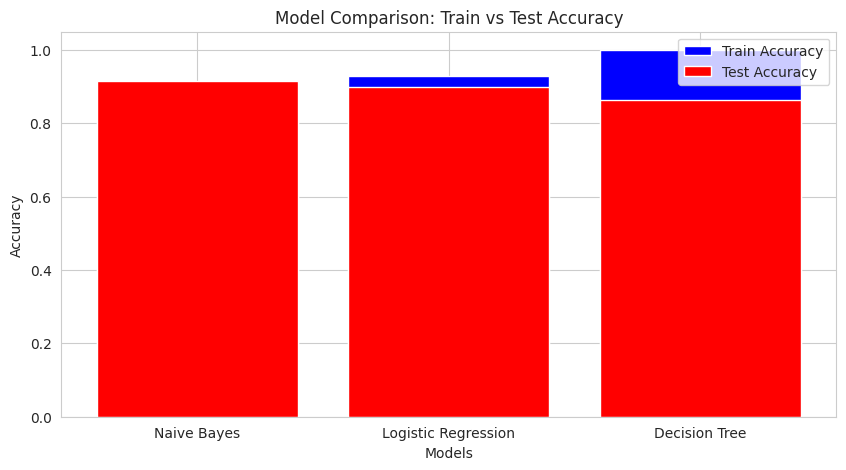

In [23]:
# Plotting graphs for results

# # Bar Plot of Accuracy
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree']
train_accuracies = [train_accuracy_nb, train_accuracy_lr, train_accuracy_dt]
test_accuracies = [test_accuracy_nb, test_accuracy_lr, test_accuracy_dt]

plt.figure(figsize=(10, 5))
plt.bar(models, train_accuracies, color='b', label='Train Accuracy')
plt.bar(models, test_accuracies, color='r', label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Train vs Test Accuracy')
plt.legend()
plt.show()

def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

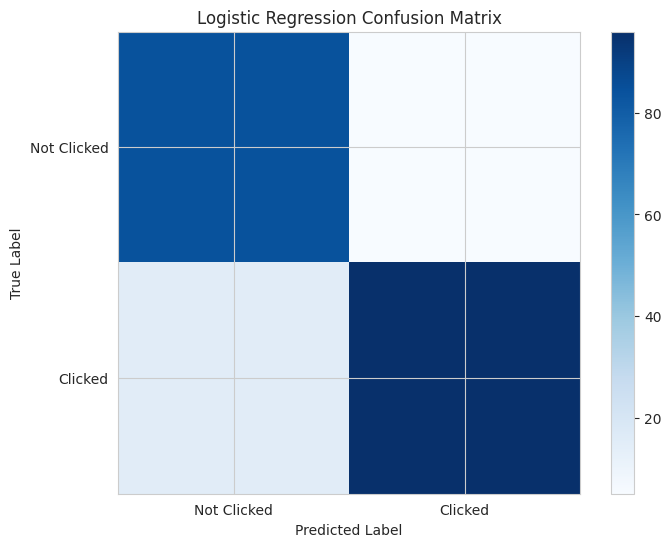

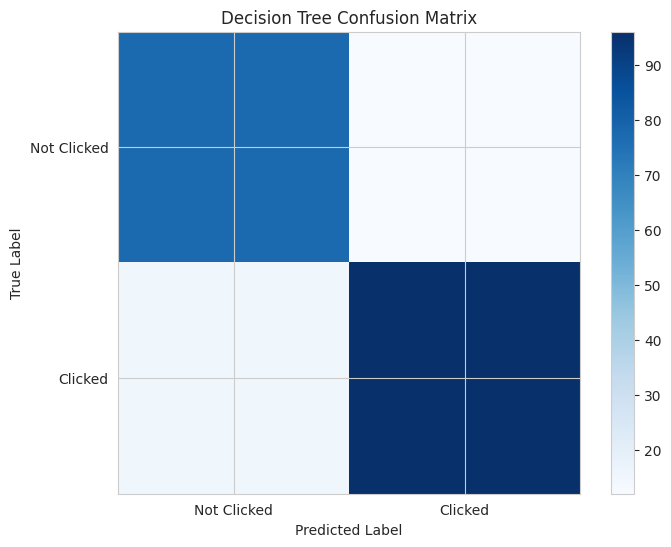

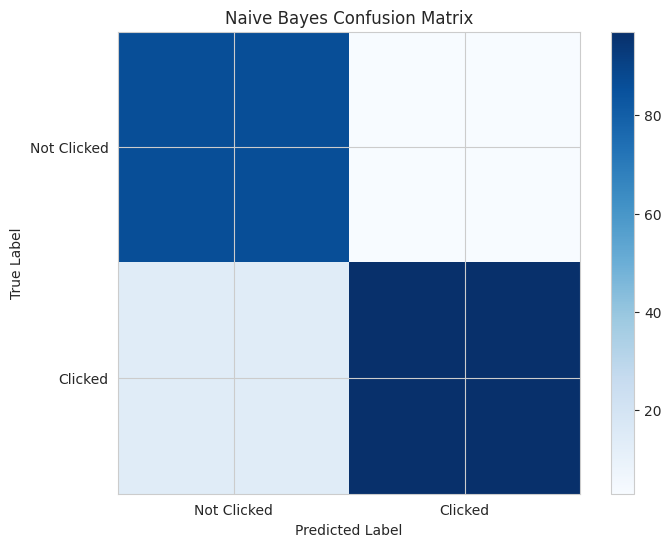

In [24]:
confusion_matrix_test = confusion_matrix(y_test, test_predictions_lr)
plot_confusion_matrix(confusion_matrix_test, classes=['Not Clicked', 'Clicked'], title='Logistic Regression Confusion Matrix')

confusion_matrix_test = confusion_matrix(y_test, test_predictions_dt)
plot_confusion_matrix(confusion_matrix_test, classes=['Not Clicked', 'Clicked'], title='Decision Tree Confusion Matrix')

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)
plot_confusion_matrix(confusion_matrix_nb, classes=['Not Clicked', 'Clicked'], title='Naive Bayes Confusion Matrix')

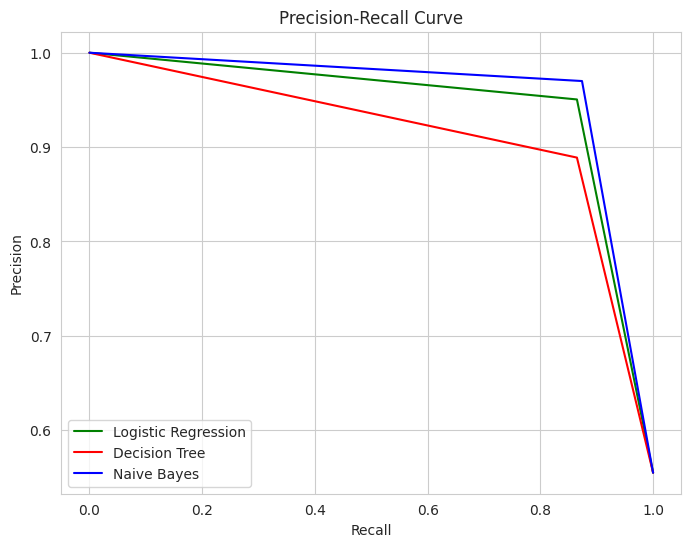

In [25]:
# Precision-Recall Curve
precision_lr, recall_lr, _ = precision_recall_curve(y_test, test_predictions_lr)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, test_predictions_dt)
precision_nb, recall_nb, _ = precision_recall_curve(y_test, test_predictions_nb)

plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, color='g', label='Logistic Regression')
plt.plot(recall_dt, precision_dt, color='r', label='Decision Tree')
plt.plot(recall_nb, precision_nb, color='b', label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

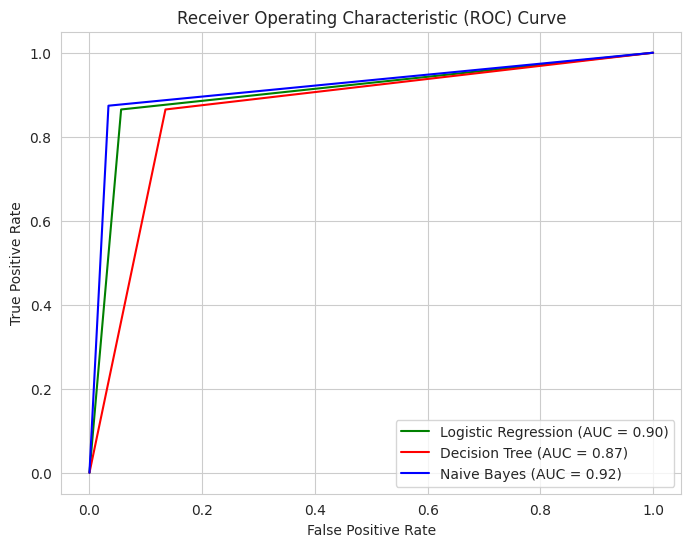

In [26]:
# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, test_predictions_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, test_predictions_dt)
fpr_nb, tpr_nb, _ = roc_curve(y_test, test_predictions_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='g', label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr_lr, tpr_lr)))
plt.plot(fpr_dt, tpr_dt, color='r', label='Decision Tree (AUC = {:.2f})'.format(auc(fpr_dt, tpr_dt)))
plt.plot(fpr_nb, tpr_nb, color='b', label='Naive Bayes (AUC = {:.2f})'.format(auc(fpr_nb, tpr_nb)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()